In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import qqplot


In [2]:
print("pandas version " + pd.__version__)
print("numpy version " + np.__version__)
print("scipy version " + scipy.__version__)
print("matplotlib version " + matplotlib.__version__)
print("seaborn version " + sns.__version__)
print("statsmodels version " + sm.__version__)

pandas version 1.0.5
numpy version 1.18.5
scipy version 1.5.0
matplotlib version 3.2.2
seaborn version 0.10.1
statsmodels version 0.11.1


In [3]:
df = pd.read_csv(r"medical_data.csv")

In [4]:
#pd.options.display.float_format = '{:,.6f}'.format
pd.set_option('display.max_columns', None) #show all columns

In [5]:
#df.describe()

In [6]:
df.rename(columns={df.columns[0]: "Original_order"}, inplace=True)

In [7]:
df.shape

(10000, 53)

In [8]:
df['ReAdmis'].mode()

0    No
dtype: object

In [9]:
df['ReAdmis'].value_counts()

No     6331
Yes    3669
Name: ReAdmis, dtype: int64

In this section is where most of the data cleaning will take place.
Standardize numeric fields
Re-expression of categorical data as numeric
This is a dictionary to define the categories to numerical values

In [10]:
cleanup_ed = {'No Schooling Completed': 0,
             'Nursery School to 8th Grade': 1,
              '9th Grade to 12th Grade, No Diploma': 9,
              'Some College, Less than 1 Year': 12,
              'GED or Alternative Credential': 12,
              'Regular High School Diploma': 12,
              'Professional School Degree': 12,
              'Some College, 1 or More Years, No Degree':13,
              'Associate\'s Degree': 14,
              'Bachelor\'s Degree': 16,
              'Master\'s Degree': 18,            
              'Doctorate Degree': 20
             }

In [11]:
df.replace(cleanup_ed, inplace=True)

In [12]:
df.head(2)

,Original_order,ID,Customer_id,Interaction,UID,zip,Lat,Lng,City,State,Population,County,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,ReAdmis,Gender,vitD_levels,doc_visits,full_meals_eaten,vitD_supp,Soft_drink,Initial_Admin,HighBlood,Stroke,Complication_Risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_Days,TotalCharge,Additional_Charges,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,35621,34.34960,-86.72508,Eva,AL,2951,Morgan,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,12,Full Time,86575.93,Divorced,No,Male,17.80233,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.40342,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,32446,30.84513,-85.22907,Marianna,FL,11303,Jackson,Urban,America/Chicago,Community development worker,3.0,51.0,13,Full Time,46805.99,Married,No,Female,18.99464,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.99812,3,4,3,4,4,4,3,3


Select numeric data

In [13]:
df.shape

(10000, 53)

In [14]:
numeric_data = df.select_dtypes(include=np.number)

In [15]:
numeric_data.shape

(10000, 27)

In [16]:
#print(numeric_data)

In [17]:
numeric_data = numeric_data.drop(['Original_order','ID','zip','Lat','Lng','Overweight','Anxiety','vitD_supp'], axis=1)

In [18]:
numeric_data = numeric_data.dropna()

In [19]:
numeric_data.shape

(3778, 19)

In [20]:
numeric_data.head(15)

,Population,Children,Age,Education,Income,vitD_levels,doc_visits,full_meals_eaten,Initial_Days,TotalCharge,Additional_Charges,item1,item2,item3,item4,item5,item6,item7,item8
0,2951,1.0,53.0,12,86575.93,17.802330,6,0,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,11303,3.0,51.0,13,46805.99,18.994640,4,2,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,17125,3.0,53.0,13,14370.14,17.415889,4,1,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,2162,0.0,78.0,12,39741.49,17.420079,4,1,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
6,2558,0.0,50.0,16,10456.05,14.348350,6,0,9.058210,3533.292197,16815.513600,4,3,3,2,3,4,5,5
9,5840,2.0,78.0,13,38965.22,19.628554,7,1,1.632554,3709.547665,26225.989910,5,5,5,3,4,2,3,2
10,426,4.0,55.0,18,38503.82,17.613389,6,3,2.595912,3042.386578,18518.043170,3,3,4,4,2,5,2,3
14,8565,1.0,85.0,20,41558.19,15.982161,4,2,1.012586,2330.422557,14382.229260,4,5,5,4,5,3,3,5
16,22149,10.0,44.0,13,24250.51,17.163216,5,1,7.038432,2938.953493,8157.752223,5,4,5,2,4,3,4,3
17,612,0.0,54.0,12,17345.63,17.286029,4,2,2.064510,2631.702104,9539.219271,4,4,3,5,2,4,5,4


In [21]:
#numeric_data.count()

{'whiskers': [<matplotlib.lines.Line2D at 0x1cfe7f3bcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cfe7f4f3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cfe7f3b970>],
 'medians': [<matplotlib.lines.Line2D at 0x1cfe7f4fa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cfe7f4fd90>],
 'means': []}

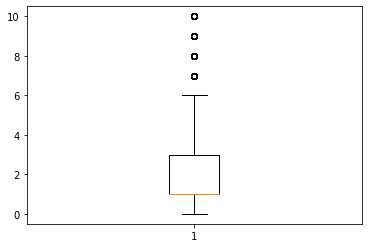

In [22]:
plt.boxplot(numeric_data.Children)

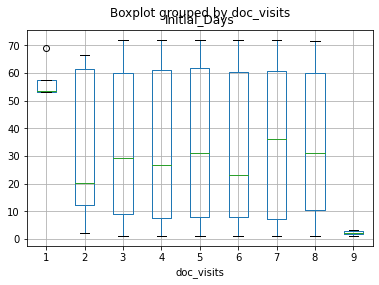

In [23]:
numeric_data.boxplot(column='Initial_Days', by='doc_visits')

In [24]:
#two way table
grouped = numeric_data.groupby(['doc_visits','Initial_Days'])
grouped.size()

doc_visits  Initial_Days
1           52.936535       1
            53.276863       1
            53.770068       1
            68.949010       1
2           2.125663        1
                           ..
8           69.963431       1
            69.983002       1
            71.495834       1
9           1.166670        1
            3.372042        1
Length: 3778, dtype: int64

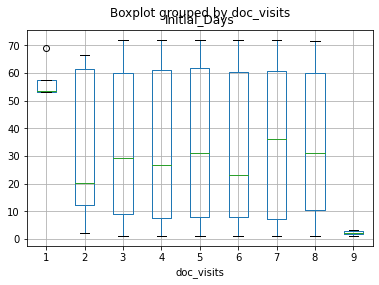

In [25]:
numeric_data.boxplot(column='Initial_Days', by='doc_visits')

In [26]:
numeric_data.describe()

,Population,Children,Age,Education,Income,vitD_levels,doc_visits,full_meals_eaten,Initial_Days,TotalCharge,Additional_Charges,item1,item2,item3,item4,item5,item6,item7,item8
count,3778.000000,3778.000000,3778.000000,3778.000000,3778.000000,3778.000000,3778.000000,3778.000000,3778.000000,3778.000000,3778.000000,3778.000000,3778.000000,3778.000000,3778.000000,3778.000000,3778.000000,3778.000000,3778.000000
mean,9953.475648,2.111435,53.464267,12.493383,40624.762697,19.439893,5.005029,0.994442,34.224053,5895.196024,12840.114923,3.522763,3.526204,3.502912,3.506617,3.502382,3.504235,3.491265,3.485707
std,14758.270491,2.149686,20.486392,3.904145,28689.147436,6.894642,1.063126,1.006845,26.385354,3439.103256,6496.130698,1.012307,1.027025,1.015953,1.057061,1.039653,1.034029,1.014615,1.041593
min,0.000000,0.000000,18.000000,0.000000,154.080000,9.553535,1.000000,0.000000,1.001981,1256.751699,3125.702716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,695.750000,1.000000,36.000000,12.000000,19549.250000,16.479348,4.000000,0.000000,7.699448,3223.927116,7923.011738,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2768.000000,1.000000,53.000000,12.000000,34187.880000,18.070532,5.000000,1.000000,27.588148,5729.060497,11394.397030,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000
75%,13614.500000,3.000000,71.000000,16.000000,54553.452500,19.768315,6.000000,2.000000,61.116686,7611.468776,15366.226943,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,105799.000000,10.000000,89.000000,20.000000,207249.130000,52.757599,9.000000,7.000000,71.981486,20525.307300,30566.073130,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


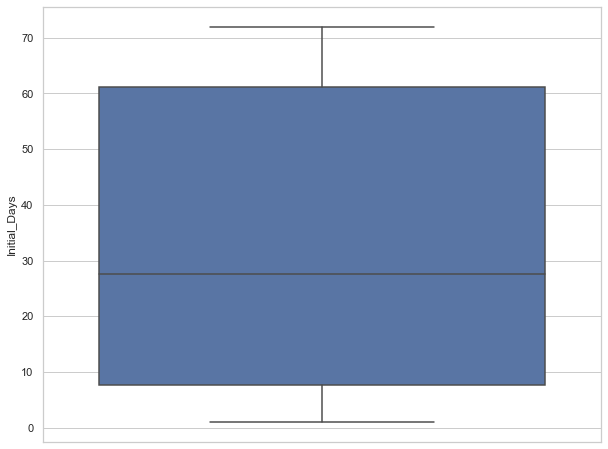

In [27]:
%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Initial_Days', data=numeric_data, orient="v")

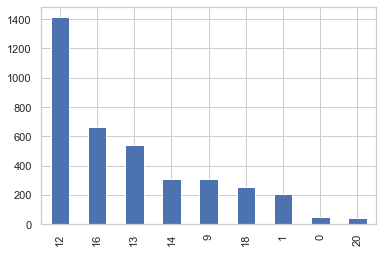

In [28]:
numeric_data['Education'].value_counts().head(10).plot.bar()

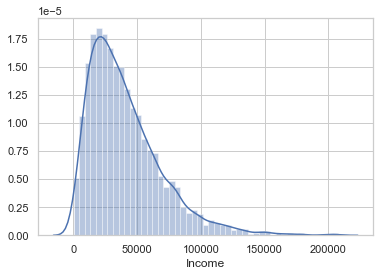

In [29]:
sns.distplot(numeric_data['Income'])


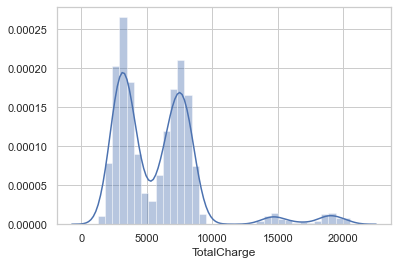

In [30]:
sns.distplot(numeric_data['TotalCharge']);

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#Get column names first
names = numeric_data.columns

In [32]:
# Create the Scaler object
scaler = StandardScaler()

In [33]:
scaled_df = scaler.fit_transform(numeric_data)

In [34]:
type(scaled_df)

numpy.ndarray

In [35]:
type(names)
print(names)

Index(['Population', 'Children', 'Age', 'Education', 'Income', 'vitD_levels',
       'doc_visits', 'full_meals_eaten', 'Initial_Days', 'TotalCharge',
       'Additional_Charges', 'item1', 'item2', 'item3', 'item4', 'item5',
       'item6', 'item7', 'item8'],
      dtype='object')


In [36]:
numeric_data = pd.DataFrame(scaled_df, columns = numeric_data.columns)

In [37]:
numeric_data.head(15)

,Population,Children,Age,Education,Income,vitD_levels,doc_visits,full_meals_eaten,Initial_Days,TotalCharge,Additional_Charges,item1,item2,item3,item4,item5,item6,item7,item8
0,-0.474541,-0.517090,-0.022665,-0.126391,1.601904,-0.237544,0.936016,-0.987812,-0.896005,-0.786398,0.785077,-0.516476,-0.512426,-1.479508,-1.425478,0.478702,-0.487705,-0.484253,0.493822
1,0.091454,0.413401,-0.120304,0.129781,0.215484,-0.064588,-0.945478,0.998855,-0.723773,-0.488649,0.734824,-0.516476,0.461389,-0.495080,0.466811,0.478702,0.479513,-0.484253,-0.466373
2,0.485997,0.413401,-0.022665,0.129781,-0.915262,-0.293601,-0.945478,0.005521,-1.116368,-1.081125,0.718227,-1.504449,0.461389,0.489348,0.466811,-0.483285,0.479513,-0.484253,-0.466373
3,-0.528009,-0.982336,1.197819,-0.126391,-0.030792,-0.292993,-0.945478,0.005521,-1.232255,-0.997507,0.023605,-0.516476,1.435204,1.473776,-0.479333,0.478702,1.446731,1.487198,1.454017
4,-0.501174,-0.982336,-0.169123,0.898297,-1.051711,-0.738576,0.936016,-0.987812,-0.953907,-0.686870,0.612045,0.471497,-0.512426,-0.495080,-1.425478,-0.483285,0.479513,1.487198,1.454017
5,-0.278760,-0.051844,1.197819,0.129781,-0.057853,0.027367,1.876763,0.005521,-1.235375,-0.635613,2.060865,1.459470,1.435204,1.473776,-0.479333,0.478702,-1.454924,-0.484253,-1.426568
6,-0.645654,0.878647,0.074973,1.410641,-0.073938,-0.264952,0.936016,1.992188,-1.198859,-0.829631,0.874163,-0.516476,-0.512426,0.489348,0.466811,-1.445272,1.446731,-1.469978,-0.466373
7,-0.094094,-0.517090,1.539554,1.922985,0.032540,-0.501576,-0.945478,0.998855,-1.258875,-1.036679,0.237421,0.471497,1.435204,1.473776,0.466811,1.440688,-0.487705,-0.484253,1.454017
8,0.826461,3.670122,-0.462039,0.129781,-0.570823,-0.330253,-0.004731,0.005521,-1.030466,-0.859711,-0.720888,1.459470,0.461389,1.473776,-1.425478,0.478702,-0.487705,0.501473,-0.466373
9,-0.633049,-0.982336,0.026154,-0.126391,-0.811534,-0.312438,-0.945478,0.998855,-1.219002,-0.949063,-0.508200,0.471497,0.461389,-0.495080,1.412956,-1.445272,0.479513,1.487198,0.493822


In [38]:
numeric_data.shape

(3778, 19)

In [39]:
numeric_data.describe()

,Population,Children,Age,Education,Income,vitD_levels,doc_visits,full_meals_eaten,Initial_Days,TotalCharge,Additional_Charges,item1,item2,item3,item4,item5,item6,item7,item8
count,3.778000e+03,3.778000e+03,3.778000e+03,3.778000e+03,3.778000e+03,3.778000e+03,3.778000e+03,3.778000e+03,3.778000e+03,3.778000e+03,3.778000e+03,3.778000e+03,3.778000e+03,3.778000e+03,3.778000e+03,3.778000e+03,3.778000e+03,3.778000e+03,3.778000e+03
mean,1.052038e-17,1.074665e-16,4.102359e-17,-6.219365e-16,7.314307e-17,7.202638e-17,-6.204277e-17,-4.902261e-16,-1.022651e-16,-4.434721e-16,-2.088501e-16,1.121978e-16,-1.493423e-16,-3.622036e-16,4.511714e-16,-1.775240e-16,-1.235703e-16,1.745560e-17,-1.471530e-16
std,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00
min,-6.745230e-01,-9.823360e-01,-1.731342e+00,-3.200454e+00,-1.410848e+00,-1.434109e+00,-3.767718e+00,-9.878117e-01,-1.259277e+00,-1.348915e+00,-1.495613e+00,-2.492422e+00,-2.460056e+00,-2.463936e+00,-2.371622e+00,-2.407258e+00,-2.422142e+00,-2.455704e+00,-2.386763e+00
25%,-6.273737e-01,-5.170902e-01,-8.525942e-01,-1.263908e-01,-7.347135e-01,-4.294548e-01,-9.454779e-01,-9.878117e-01,-1.005411e+00,-7.768370e-01,-7.570282e-01,-5.164761e-01,-5.124257e-01,-4.950803e-01,-4.793332e-01,-4.832850e-01,-4.877054e-01,-4.842527e-01,-4.663731e-01
50%,-4.869423e-01,-5.170902e-01,-2.266520e-02,-1.263908e-01,-2.243962e-01,-1.986386e-01,-4.731125e-03,5.521439e-03,-2.515328e-01,-4.831420e-02,-2.225801e-01,4.714969e-01,4.613893e-01,-4.950803e-01,4.668114e-01,4.787016e-01,4.795130e-01,-4.842527e-01,-4.663731e-01
75%,2.480988e-01,4.134013e-01,8.560831e-01,8.982970e-01,4.855681e-01,4.764067e-02,9.360157e-01,9.988546e-01,1.019361e+00,4.991126e-01,3.889156e-01,4.714969e-01,4.613893e-01,4.893478e-01,4.668114e-01,4.787016e-01,4.795130e-01,5.014729e-01,4.938218e-01
max,6.495220e+00,3.670122e+00,1.734831e+00,1.922985e+00,5.808692e+00,4.833046e+00,3.758256e+00,5.965520e+00,1.431189e+00,4.254611e+00,2.729056e+00,3.435416e+00,3.382834e+00,3.442632e+00,3.305245e+00,3.364661e+00,3.381168e+00,3.458650e+00,3.374407e+00


In [40]:
numeric_data.to_csv('numeric_data.csv')


In [41]:
print(np.mean(numeric_data['Income']),np.std(numeric_data['Income']))

7.314306798020155e-17 0.9999999999999991


In [42]:
numeric_data.shape

(3778, 19)

(array([1005.,  580.,  259.,   52.,   14.,   97.,  196.,  388.,  546.,
         641.]),
 array([-1.25927701, -0.9902304 , -0.72118378, -0.45213717, -0.18309055,
         0.08595606,  0.35500268,  0.62404929,  0.89309591,  1.16214252,
         1.43118914]),
 <a list of 10 Patch objects>)

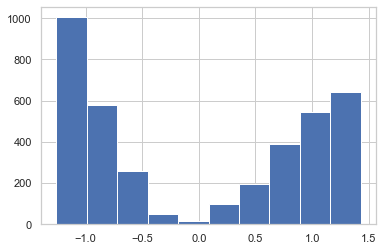

In [43]:
plt.hist(numeric_data['Initial_Days'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cfea144fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cfea1526a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cfea144c40>],
 'medians': [<matplotlib.lines.Line2D at 0x1cfea152d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cfea1600a0>],
 'means': []}

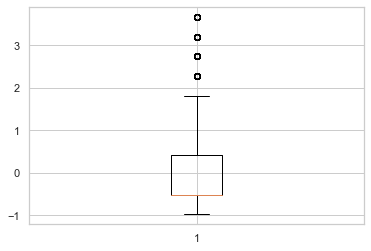

In [44]:
plt.boxplot(numeric_data.Children)

In [45]:
correl = numeric_data.corr()

In [46]:
display(correl)

,Population,Children,Age,Education,Income,vitD_levels,doc_visits,full_meals_eaten,Initial_Days,TotalCharge,Additional_Charges,item1,item2,item3,item4,item5,item6,item7,item8
Population,1.000000,0.006939,0.000240,0.036502,-0.004368,0.012067,0.011521,-0.036783,0.023906,0.023495,0.016837,0.008241,0.011739,0.004017,-0.001151,-0.001795,0.009404,0.000786,-0.015989
Children,0.006939,1.000000,-0.008239,0.009284,0.008301,-0.004006,-0.000477,-0.014270,0.006997,-0.000794,0.008160,0.004005,0.023561,-0.001058,-0.016112,0.018776,-0.015637,0.000628,-0.016375
Age,0.000240,-0.008239,1.000000,-0.018426,-0.009844,0.020961,0.023841,0.015939,0.029957,0.040980,0.715265,-0.005463,0.001259,-0.003309,0.017684,0.004896,-0.010941,0.014589,-0.014082
Education,0.036502,0.009284,-0.018426,1.000000,-0.009332,0.006684,0.011458,0.019692,0.017271,0.014781,-0.003033,0.002316,0.012886,-0.004901,0.001069,0.008190,-0.003075,-0.018094,-0.011808
Income,-0.004368,0.008301,-0.009844,-0.009332,1.000000,-0.001380,0.013922,-0.008362,0.007447,0.010696,0.015946,-0.013408,-0.000877,-0.006346,-0.002528,0.004918,-0.009218,-0.010494,0.001366
vitD_levels,0.012067,-0.004006,0.020961,0.006684,-0.001380,1.000000,-0.006866,0.028382,0.019191,0.739293,0.000336,0.012093,-0.000527,-0.011276,0.022720,-0.005847,0.027978,0.003942,-0.003377
doc_visits,0.011521,-0.000477,0.023841,0.011458,0.013922,-0.006866,1.000000,-0.003931,-0.004034,-0.007155,0.021855,-0.004412,0.006063,0.007953,-0.020409,0.012086,0.000101,0.002127,-0.001728
full_meals_eaten,-0.036783,-0.014270,0.015939,0.019692,-0.008362,0.028382,-0.003931,1.000000,-0.011326,0.015087,0.023556,0.011164,0.003085,0.029393,0.005881,0.007727,0.005490,-0.004842,-0.030245
Initial_Days,0.023906,0.006997,0.029957,0.017271,0.007447,0.019191,-0.004034,-0.011326,1.000000,0.642857,0.011593,-0.003831,0.009731,-0.014689,-0.026377,-0.002439,-0.014924,-0.015288,-0.008577
TotalCharge,0.023495,-0.000794,0.040980,0.014781,0.010696,0.739293,-0.007155,0.015087,0.642857,1.000000,0.029641,0.001734,-0.000320,-0.013354,0.003571,-0.011860,0.008961,-0.003700,-0.004459


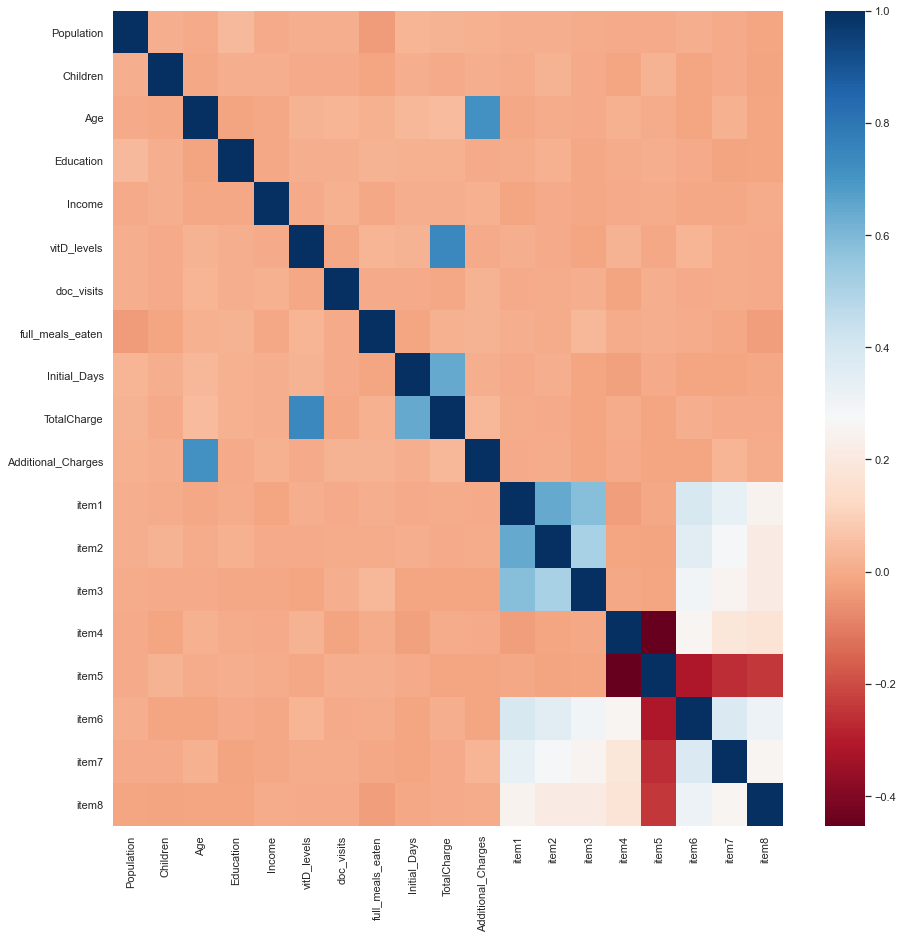

In [47]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correl, xticklabels = correl.columns, yticklabels = correl.columns, cmap='RdBu') 

In [48]:
abs(numeric_data.corr())['Initial_Days']

Population            0.023906
Children              0.006997
Age                   0.029957
Education             0.017271
Income                0.007447
vitD_levels           0.019191
doc_visits            0.004034
full_meals_eaten      0.011326
Initial_Days          1.000000
TotalCharge           0.642857
Additional_Charges    0.011593
item1                 0.003831
item2                 0.009731
item3                 0.014689
item4                 0.026377
item5                 0.002439
item6                 0.014924
item7                 0.015288
item8                 0.008577
Name: Initial_Days, dtype: float64

In [49]:
sorted = numeric_data.corr()['Initial_Days']
sorted = sorted.sort_values(ascending=False)
print(sorted)

Initial_Days          1.000000
TotalCharge           0.642857
Age                   0.029957
Population            0.023906
vitD_levels           0.019191
Education             0.017271
Additional_Charges    0.011593
item2                 0.009731
Income                0.007447
Children              0.006997
item5                -0.002439
item1                -0.003831
doc_visits           -0.004034
item8                -0.008577
full_meals_eaten     -0.011326
item3                -0.014689
item6                -0.014924
item7                -0.015288
item4                -0.026377
Name: Initial_Days, dtype: float64


Clean up of Data. We will not be replacing nulls with zeros or the average. Each column's proper course of action will be considered during analysis. Applying broad cleaning measures can lead to skewed data.

Continuous variable chosen: Initial_Days

The MLR requires a continuous variable. It was advised to select any continuous variable for this analysis

GROSS MODEL

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [51]:
X = numeric_data.loc[:,numeric_data.columns!='Initial_Days']
y = numeric_data['Initial_Days']


In [52]:
X_training, X_testing, y_train, y_test = train_test_split(X, y, test_size=0.25)
#, random_state=42

In [53]:
reg = LinearRegression()
regmodel = reg.fit(X_training, y_train)

In [54]:
regscore = regmodel.score(X_testing,y_test)
# The _R-squared_ score used when calling score on a regressor uses 
# multioutput='uniform_average' from version 0.23 to keep
#consistent with default value of r2_score

In [55]:
print(regscore)

0.871799212371865


This R-square states that applying the model on the test data shows the model is accurate 87% of the time

In [56]:
y_pred = regmodel.predict(X_testing)

In [57]:
predictions = pd.DataFrame({'Predicted y Value': y_pred, 'Actual Value':y_test})

In [58]:
print(predictions)

      Predicted y Value  Actual Value
653           -0.550093     -1.183247
2561           1.030890      1.017999
1430          -0.901192     -1.026838
1373          -0.914574     -0.913990
2699           0.621919      0.514888
...                 ...           ...
169            0.211401     -0.425765
3294           0.541664      0.834083
2051           0.910173      0.387061
285           -0.263194     -1.003483
279           -0.499197     -0.607383

[945 rows x 2 columns]


In [59]:
regmodel_coeffs = regmodel.coef_
#returns array 

In [60]:
# The mean squared error
mse1 =  mean_squared_error(y_test, y_pred,  multioutput='raw_values')
#print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred,  multioutput='raw_values'))
print('Mean squared error: %.3f' % mse1)

Mean squared error: 0.129


In [61]:
rse1 = np.sqrt(mse1)
print("RSE of the model %.3f " % rse1)

RSE of the model 0.359 


Train Test Split for the StatsModels OLS

For some of the values, the prediction is not close, the positive and negative direction are correct.


In [62]:
train, test = train_test_split(numeric_data, test_size=0.25)

In [63]:
#train.head(5)

In [64]:
train.shape

(2833, 19)

In [65]:
# Import the ols function
from statsmodels.formula.api import ols

In [66]:
# All variables
mdl_init_vs_all = ols("Initial_Days ~ TotalCharge + Age + Population + vitD_levels + Education + \
                        Additional_Charges + item2 + Income + Children + item5 + item1 + \
                        doc_visits + item8 + full_meals_eaten + item3 + item6 + item7 + \
                        item4 + 0", data=train).fit()

In [67]:
mdl_init_vs_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Initial_Days   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              1086.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):                        0.00
Time:                        14:23:12   Log-Likelihood:                         -1076.8
No. Observations:                2833   AIC:                                      2190.
Df Residuals:                    2815   BIC:                                      2297.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
TotalCharge            1.3844      0.010    139.413      0.000       1.365       1.404
Age                    0.0339      0.010      3.545      0.000       0.015       0.053
Population             0.0019      0.007      0.285      0.776      -0.011       0.015
vitD_levels           -1.0092      0.010   -101.842      0.000      -1.029      -0.990
Education              0.0035      0.007      0.518      0.604      -0.010       0.017
Additional_Charges    -0.0475      0.010     -4.952      0.000      -0.066      -0.029
item2                  0.0176      0.009      1.950      0.051      -0.000       0.035
Income                -0.0089      0.007     -1.349      0.177      -0.022       0.004
Children               0.0027      0.007      0.396      0.692      -0.011       0.016
item5                  0.0015      0.008      0.185      0.853      -0.014       0.017
item1                  0.0083      0.010      0.845      0.398      -0.011       0.028
doc_visits            -0.0074      0.007     -1.117      0.264      -0.021       0.006
item8                 -0.0062      0.007     -0.848      0.396      -0.021       0.008
full_meals_eaten      -0.0007      0.007     -0.113      0.910      -0.014       0.012
item3                 -0.0216      0.008     -2.561      0.010      -0.038      -0.005
item6                  0.0003      0.008      0.032      0.975      -0.016       0.016
item7                 -0.0037      0.008     -0.474      0.635      -0.019       0.011
item4                 -0.0053      0.008     -0.686      0.493      -0.020       0.010
==============================================================================
Omnibus:                        0.268   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.307
Skew:                          -0.019   Prob(JB):                        0.858
Kurtosis:                       2.967   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The first table i.e. overall model statistics, you can learn about:

R-squared
R-squared and Adj. R-squared metrics are reported by default with regression models.
R-squared is a metric that measures how close the data is to the fitted regression line. R-squared can be positive or negative. When the fit is perfect R-squared is 1. Note that adding features to the model won’t decrease R-squared. This is because the model can find the same fit as before when more features are added. More often the R-squared increases by chance when adding features.

Adjusted R-squared
The adjusted R-squared addresses the issues of R-squared by adjusting it for the number of features in the model. Adding more features to the model will increase R-squared, but potentially decrease Adjusted R-squared. This property of Adjusted R-squared may be used to find the features that give the best accuracy. Adj. R-squared is on the range between 0 to 1, where 1 indicates that the model explains all the variability of the response data around its mean.
Note, high Adjusted R-squared doesn’t mean that your model is good. We need to check the residual plot when fitting a regression model. One of the assumptions of Linear Regression is Homoscedasticity, which means that the variance of residual is the same for any value of X. I am going to write about residual plots in my next article about regression models.

What is the meaning of coefficients?
The sign of a coefficient tells us whether there is a positive or negative correlation between a feature and a target variable.
The positive coefficient indicates when the feature increases, the mean of the target also increases. A negative coefficient indicates as the feature value decreases, the target tends to decrease.

F-Stat: It is a statistical test that compare the fit of the intercept-only model with your model. In simple words, if P value for the F-Stat (here Prob (F-Statistic) is less than your significance level, one can reject the null hypothesis that a intercept-only model is better, meaning your model is better a better job (Not a big surprise honestly). IE, these variables have no effect.

The second table i.e. summary of statistics of your model breakdown:

Gives a lot of information about each variable. Each coefficient with its corresponding standard error, t-statistic, p-value. For instance, for each coefficient if the t-statistic is large (or simply the p-value is ZERO or very very small < 0.05), that particular coefficient is trustworthy like discount or stockout, otherwise the error is large and unlikely any interpretation from them to be reliable like some of the sublevels of prod_function or prod_regime categorical variables in your model. *Just a rough thought about these variables in your model, maybe the type of categorical encoding you do on these is not performing well, that is why the errors here are large?!

How To Interpret Your Model:

This is an interesting part. Taking that your model is good enough (within the defined confidence interval), one can find out how each of these variables contribute to the dependant variable (herein sales). Read more about how Interpreting Regression Coefficients or see this nice and simple example.

Specifically for the discount variable, if all other variables are fixed, then for each change of 1 unit in discount, sales changes, on average, by 0.4146 units (the coefficient of the discount from your model).

https://datascience.stackexchange.com/questions/41034/interpreting-multi-linear-regression-results


Interpretation of the Model Coefficient and the P-value

The central section of the output, where the header begins with coef, is important for model interpretation. If the p-value, shown under the column labeled P>|t|, is less than the significance value of 0.05, the difference is statistically significant. This means that there is a strong evidence of a linear association between the dependent variable 'Initial_days' and the dependent variable.



The p-values are statistically significant at the 0.05 level. We can trust these findings if multicollinearity is within acceptable levels.

In [68]:
mdl_init_vs_all.params

TotalCharge           1.384369
Age                   0.033904
Population            0.001886
vitD_levels          -1.009164
Education             0.003499
Additional_Charges   -0.047538
item2                 0.017617
Income               -0.008884
Children              0.002661
item5                 0.001470
item1                 0.008309
doc_visits           -0.007446
item8                -0.006229
full_meals_eaten     -0.000741
item3                -0.021635
item6                 0.000259
item7                -0.003654
item4                -0.005284
dtype: float64

In [69]:
mdl_init_vs_all.fittedvalues

1971    1.287827
3410    1.085507
197    -0.511473
3268    0.755904
2017    0.594279
          ...   
2885    0.831891
1641   -1.033910
1886   -0.739345
3039    0.639483
3484   -0.055995
Length: 2833, dtype: float64

In [70]:
mdl_init_vs_all.resid

1971   -0.259124
3410    0.245143
197    -0.253905
3268    0.313576
2017    0.168970
          ...   
2885   -0.301388
1641    0.504034
1886   -0.329351
3039    0.017982
3484    0.404462
Length: 2833, dtype: float64

Coefficient of Determination(rsquared). The coefficient of determination is a measure of how well the linear regression line fits the observed values. For simple linear regression, it is equal to the square of the correlation between the explanatory and response variables.

In [71]:
mdl_init_vs_all.rsquared

0.8741531102727567

This means that the chosen variables explain 87.5% of the dependent variable "Initial_Days"

Residual Standard Error(RSE) is a measure of the typical size of the residuals. Equivalently, it's a measure of how wrong you can expect predictions to be. Smaller numbers are better, with zero being a perfect fit to the data. Take sqrt of MSE to get RSE

In [72]:
mse = mdl_init_vs_all.mse_resid

In [73]:
mse

0.12602251089898875

In [74]:
rse = np.sqrt(mse)
print("RSE of the model: ", rse)

RSE of the model:  0.3549964942066171


This means that the typical difference between standardized observed values of the variable "Initial_days" is .354

In [75]:
# 10 variables with highest correlation
#mdl_init_vs_all_inter = ols("Initial_Days ~ TotalCharge * Age * Population * vitD_levels * Education * \
#                        Additional_Charges * item2 * Income * Children + 0", data=numeric_data).fit()

In [76]:
#dl_init_vs_all_inter.summary()

Running the model against the test data

In [77]:
test_result = mdl_init_vs_all.predict(test)

In [78]:
print(test_result)

3092    1.603510
1501   -1.137790
1090   -0.947070
2948    0.591091
2881    0.579327
          ...   
2403    0.507045
2643    0.634492
594    -1.422662
1531   -0.432040
2746    1.079463
Length: 945, dtype: float64


In [79]:
test_data_df = test.assign(coeff = mdl_init_vs_all.predict(test))

In [80]:
test_data_df[['coeff', 'Initial_Days']]

,coeff,Initial_Days
3092,1.603510,1.393132
1501,-1.137790,-0.962278
1090,-0.947070,-1.034100
2948,0.591091,1.047652
2881,0.579327,1.005865
...,...,...
2403,0.507045,0.605681
2643,0.634492,0.717528
594,-1.422662,-1.255731
1531,-0.432040,-0.815995


Now a reduced model
First, check for multi-collinearity with scaled data
numeric_data has already had the NAN values dropped



Interpreting VIF

VIF measures multi-collineraity.

Specific to the variable, not the model

VIF should be not greater than ...
Exactly how large a VIF has to be before it causes issues is a subject of debate. What is known is that the more your VIF increases, the less reliable your regression results are going to be. In general, a VIF above 10 indicates high correlation and is cause for concern. Some authors suggest a more conservative level of 2.5 or above.



PCA

In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [82]:
numeric_data.shape

(3778, 19)

[0.15249043 0.10750063 0.08902134 0.0881743  0.05699803 0.05472688
 0.05366252 0.05246241 0.05193067 0.05073911 0.04967201]


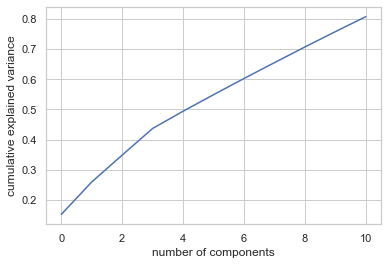

In [83]:
pca = PCA(n_components=.80)
# If n_components == 'mle' and svd_solver 
# == 'full', Minka’s MLE is used to guess the dimension. 
# Use of n_components == 'mle' will interpret svd_solver 
# == 'auto' as svd_solver == 'full'.


#pca.fit(train) 
#pca.fit_transform(train)

pca_array = pca.fit_transform(train)
#fit PCA to numeric data
print(pca.explained_variance_ratio_)
# it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.
#If we plot these principal components beside the original data, we see the plots shown here:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [84]:
pca

PCA(n_components=0.8)

In [85]:
#pcaMLE = PCA(n_components='mle')
pcaMLE = PCA(n_components=10)
pcaMLE.fit(train)
print(pcaMLE.explained_variance_ratio_)

[0.15249043 0.10750063 0.08902134 0.0881743  0.05699803 0.05472688
 0.05366252 0.05246241 0.05193067 0.05073911]


import libraries for scree plot

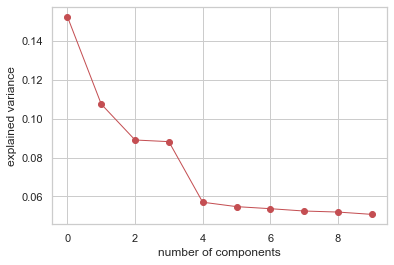

In [86]:
plt.plot(pcaMLE.explained_variance_ratio_, 'ro-',linewidth=1)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

extracting eigen values

In [87]:
cov_matrix = np.dot(train.T, train) / train.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

Eigenvalues
The corresponding eigenvalue is a number that indicates how
much variance there is in the data along that eigenvector 
(or principal component). In other words, a larger eigenvalue
means that that principal component explains a large amount of
the variance in the data. 
The suggested cutoff point is any eigen value less than 1,
1 is marked distinctively in the graph.

In [88]:
print(eigenvalues)

[2.9096945299063854, 2.0512584589250054, 1.6986353810687782, 1.682924008745562, 1.0875959877030352, 1.0443206667298304, 1.0240984595346605, 1.001084201942591, 0.9911442840349647, 0.968160549063894, 0.9478187024584162]


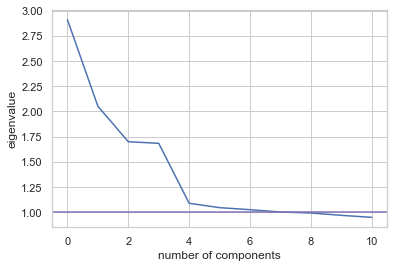

In [89]:
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.axhline(1,label='Eigenvalue'.format(1), c='m')
plt.show()

There are 7 eigenvalues with a value over 7. The first 7 PCAs have eigenvalues over 1

loads for the components

https://stats.stackexchange.com/questions/143905/loadings-vs-eigenvectors-in-pca-when-to-use-one-or-another

In PCA, you split covariance (or correlation) matrix into scale part (eigenvalues) and direction part (eigenvectors). You may then endow eigenvectors with the scale: loadings. So, loadings are thus become comparable by magnitude with the covariances/correlations observed between the variables, - because what had been drawn out from the variables' covariation now returns back - in the form of the covariation between the variables and the principal components. Actually, loadings are the covariances/correlations between the original variables and the unit-scaled components. This answer shows geometrically what loadings are and what are coefficients associating components with variables in PCA or factor analysis.

Loadings:

Help you interpret principal components or factors; Because they are the linear combination weights (coefficients) whereby unit-scaled components or factors define or "load" a variable.

(Eigenvector is just a coefficient of orthogonal transformation or projection, it is devoid of "load" within its value. "Load" is (information of the amount of) variance, magnitude. PCs are extracted to explain variance of the variables. Eigenvalues are the variances of (= explained by) PCs. When we multiply eigenvector by sq.root of the eivenvalue we "load" the bare coefficient by the amount of variance. By that virtue we make the coefficient to be the measure of association, co-variability.)

Loadings sometimes are "rotated" (e.g. varimax) afterwards to facilitate interpretability (see also);

It is loadings which "restore" the original covariance/correlation matrix (see also this thread discussing nuances of PCA and FA in that respect);

While in PCA you can compute values of components both from eigenvectors and loadings, in factor analysis you compute factor scores out of loadings.

And, above all, loading matrix is informative: its vertical sums of squares are the eigenvalues, components' variances, and its horizontal sums of squares are portions of the variables' variances being "explained" by the components.

Rescaled or standardized loading is the loading divided by the variable's st. deviation; it is the correlation. (If your PCA is correlation-based PCA, loading is equal to the rescaled one, because correlation-based PCA is the PCA on standardized variables.) Rescaled loading squared has the meaning of the contribution of a pr. component into a variable; if it is high (close to 1) the variable is well defined by that component alone.

An example of computations done in PCA and FA for you to see.

Eigenvectors are unit-scaled loadings; and they are the coefficients (the cosines) of orthogonal transformation (rotation) of variables into principal components or back. Therefore it is easy to compute the components' values (not standardized) with them. Besides that their usage is limited. Eigenvector value squared has the meaning of the contribution of a variable into a pr. component; if it is high (close to 1) the component is well defined by that variable alone.

Although eigenvectors and loadings are simply two different ways to normalize coordinates of the same points representing columns (variables) of the data on a biplot, it is not a good idea to mix the two terms. This answer explained why.

In [90]:
#pcaMLE.components_

In [91]:
loadings = pd.DataFrame(pcaMLE.components_.T,
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'],
index=train.columns)
loadings
#,'PC18','PC19','PC20','PC21','PC22'

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Population,-0.004119,0.029898,-0.018275,-0.018661,-0.519896,-0.251763,0.529002,-0.186400,0.306247,-0.154453
Children,-0.000418,0.008114,-0.012046,-0.026172,-0.118087,0.017403,0.291966,0.608288,-0.553045,0.377433
Age,-0.009373,0.119775,0.671856,-0.182816,-0.003303,-0.038824,-0.015059,0.005821,0.023841,0.022839
Education,-0.007329,0.021036,-0.037936,-0.004011,-0.057328,-0.256354,0.561705,-0.099369,-0.208913,-0.059687
Income,-0.012531,0.014004,0.020222,-0.012058,0.033362,0.786453,0.363933,0.281312,0.353285,-0.163420
vitD_levels,-0.002136,0.538128,-0.107212,-0.004618,0.177799,0.102650,0.132963,-0.302196,0.082273,0.499358
doc_visits,0.001821,-0.009471,0.053704,-0.035648,-0.153757,0.438103,0.030159,-0.534147,-0.633426,-0.255256
full_meals_eaten,0.006717,0.017493,-0.001319,-0.040176,0.776065,-0.183074,0.330706,0.000650,-0.084249,-0.372243
Initial_Days,-0.019224,0.440529,-0.078207,-0.024792,-0.208463,-0.108316,-0.210059,0.348306,-0.110266,-0.585092
TotalCharge,-0.013797,0.692303,-0.121997,-0.017007,-0.002499,0.014193,-0.034854,-0.001676,-0.009689,-0.007680


In [92]:
loadings.sort_values(by='PC1', ascending=False).head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
item1,0.446124,-0.011324,-0.072222,-0.304670,0.000135,-0.014578,-0.004928,0.001458,0.030680,0.033106
item2,0.427942,-0.010000,-0.071547,-0.294387,-0.001993,0.000302,0.014321,0.036681,-0.010276,0.015100
item6,0.415365,0.023530,0.023940,0.177143,-0.004883,0.008483,0.016338,-0.057036,0.007136,0.008783
item3,0.401919,-0.022032,-0.067211,-0.288693,0.028851,0.002565,0.016064,0.013795,0.023262,-0.017392
item7,0.352686,0.041847,0.072667,0.156256,-0.014225,0.029274,-0.032951,0.021221,-0.044747,-0.028257
item8,0.305465,-0.000446,0.042138,0.171731,-0.077758,0.002159,-0.058600,-0.025672,0.003775,-0.050316
item4,0.153562,0.036549,0.147204,0.538548,0.056881,-0.014006,0.082009,0.021629,-0.006385,0.028701
full_meals_eaten,0.006717,0.017493,-0.001319,-0.040176,0.776065,-0.183074,0.330706,0.000650,-0.084249,-0.372243
doc_visits,0.001821,-0.009471,0.053704,-0.035648,-0.153757,0.438103,0.030159,-0.534147,-0.633426,-0.255256
Children,-0.000418,0.008114,-0.012046,-0.026172,-0.118087,0.017403,0.291966,0.608288,-0.553045,0.377433


In [93]:
loadings.sort_values(by='PC2', ascending=False).head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
TotalCharge,-0.013797,0.692303,-0.121997,-0.017007,-0.002499,0.014193,-0.034854,-0.001676,-0.009689,-0.007680
vitD_levels,-0.002136,0.538128,-0.107212,-0.004618,0.177799,0.102650,0.132963,-0.302196,0.082273,0.499358
Initial_Days,-0.019224,0.440529,-0.078207,-0.024792,-0.208463,-0.108316,-0.210059,0.348306,-0.110266,-0.585092
Age,-0.009373,0.119775,0.671856,-0.182816,-0.003303,-0.038824,-0.015059,0.005821,0.023841,0.022839
Additional_Charges,-0.009373,0.118297,0.669452,-0.177212,-0.003335,-0.034842,0.031167,0.014481,0.013539,0.021055
item7,0.352686,0.041847,0.072667,0.156256,-0.014225,0.029274,-0.032951,0.021221,-0.044747,-0.028257
item4,0.153562,0.036549,0.147204,0.538548,0.056881,-0.014006,0.082009,0.021629,-0.006385,0.028701
Population,-0.004119,0.029898,-0.018275,-0.018661,-0.519896,-0.251763,0.529002,-0.186400,0.306247,-0.154453
item6,0.415365,0.023530,0.023940,0.177143,-0.004883,0.008483,0.016338,-0.057036,0.007136,0.008783
Education,-0.007329,0.021036,-0.037936,-0.004011,-0.057328,-0.256354,0.561705,-0.099369,-0.208913,-0.059687


In [94]:
loadings.sort_values(by='PC3', ascending=False).head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Age,-0.009373,0.119775,0.671856,-0.182816,-0.003303,-0.038824,-0.015059,0.005821,0.023841,0.022839
Additional_Charges,-0.009373,0.118297,0.669452,-0.177212,-0.003335,-0.034842,0.031167,0.014481,0.013539,0.021055
item4,0.153562,0.036549,0.147204,0.538548,0.056881,-0.014006,0.082009,0.021629,-0.006385,0.028701
item7,0.352686,0.041847,0.072667,0.156256,-0.014225,0.029274,-0.032951,0.021221,-0.044747,-0.028257
doc_visits,0.001821,-0.009471,0.053704,-0.035648,-0.153757,0.438103,0.030159,-0.534147,-0.633426,-0.255256
item8,0.305465,-0.000446,0.042138,0.171731,-0.077758,0.002159,-0.058600,-0.025672,0.003775,-0.050316
item6,0.415365,0.023530,0.023940,0.177143,-0.004883,0.008483,0.016338,-0.057036,0.007136,0.008783
Income,-0.012531,0.014004,0.020222,-0.012058,0.033362,0.786453,0.363933,0.281312,0.353285,-0.163420
full_meals_eaten,0.006717,0.017493,-0.001319,-0.040176,0.776065,-0.183074,0.330706,0.000650,-0.084249,-0.372243
Children,-0.000418,0.008114,-0.012046,-0.026172,-0.118087,0.017403,0.291966,0.608288,-0.553045,0.377433


In [95]:
loadings.sort_values(by='PC4', ascending=False).head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
item4,0.153562,0.036549,0.147204,0.538548,0.056881,-0.014006,0.082009,0.021629,-0.006385,0.028701
item6,0.415365,0.023530,0.023940,0.177143,-0.004883,0.008483,0.016338,-0.057036,0.007136,0.008783
item8,0.305465,-0.000446,0.042138,0.171731,-0.077758,0.002159,-0.058600,-0.025672,0.003775,-0.050316
item7,0.352686,0.041847,0.072667,0.156256,-0.014225,0.029274,-0.032951,0.021221,-0.044747,-0.028257
Education,-0.007329,0.021036,-0.037936,-0.004011,-0.057328,-0.256354,0.561705,-0.099369,-0.208913,-0.059687
vitD_levels,-0.002136,0.538128,-0.107212,-0.004618,0.177799,0.102650,0.132963,-0.302196,0.082273,0.499358
Income,-0.012531,0.014004,0.020222,-0.012058,0.033362,0.786453,0.363933,0.281312,0.353285,-0.163420
TotalCharge,-0.013797,0.692303,-0.121997,-0.017007,-0.002499,0.014193,-0.034854,-0.001676,-0.009689,-0.007680
Population,-0.004119,0.029898,-0.018275,-0.018661,-0.519896,-0.251763,0.529002,-0.186400,0.306247,-0.154453
Initial_Days,-0.019224,0.440529,-0.078207,-0.024792,-0.208463,-0.108316,-0.210059,0.348306,-0.110266,-0.585092


In [96]:
train.shape

(2833, 19)

In [97]:
print(train['Initial_Days'].isna().sum())

0


Reducing the model for efficiency

Using PCA we were able to reduce the model to 10 components.

In [98]:
print(train['Initial_Days'].isna().sum())

0


In [99]:

train.sort_values(by=['Initial_Days'])

,Population,Children,Age,Education,Income,vitD_levels,doc_visits,full_meals_eaten,Initial_Days,TotalCharge,Additional_Charges,item1,item2,item3,item4,item5,item6,item7,item8
659,0.190734,-0.051844,0.709625,-0.126391,-0.697515,-0.697004,-0.945478,0.005521,-1.259277,-1.348915,-0.249491,0.471497,0.461389,0.489348,0.466811,0.478702,-0.487705,-0.484253,0.493822
1836,2.766851,0.413401,-0.608497,0.129781,-0.056744,-0.414547,0.936016,1.992188,-1.258879,-1.023936,0.179128,1.459470,0.461389,1.473776,0.466811,-0.483285,2.413950,2.472924,0.493822
7,-0.094094,-0.517090,1.539554,1.922985,0.032540,-0.501576,-0.945478,0.998855,-1.258875,-1.036679,0.237421,0.471497,1.435204,1.473776,0.466811,1.440688,-0.487705,-0.484253,1.454017
355,-0.667814,0.413401,1.490735,-0.126391,-0.379658,-0.497664,-0.945478,-0.987812,-1.257968,-1.141346,0.173492,1.459470,2.409019,0.489348,0.466811,0.478702,-0.487705,1.487198,1.454017
827,-0.640843,0.878647,1.002541,-0.126391,-0.465478,-0.360429,-1.886225,-0.987812,-1.257865,-1.074234,1.771079,2.447443,0.461389,2.458204,2.359101,-0.483285,1.446731,1.487198,1.454017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2863,-0.304783,0.413401,1.197819,0.129781,-0.838315,0.038714,1.876763,0.005521,1.426155,1.091400,2.027227,0.471497,0.461389,0.489348,-1.425478,2.402675,0.479513,1.487198,-1.426568
3213,-0.640571,1.343893,0.270251,-2.944282,0.060506,-0.043872,-0.004731,-0.987812,1.426332,0.692218,-0.373239,-0.516476,0.461389,0.489348,0.466811,0.478702,-1.454924,-0.484253,0.493822
2665,-0.092467,-0.982336,0.172612,-0.126391,-0.109562,-0.602654,-0.004731,0.005521,1.426946,0.772747,-0.435833,-0.516476,0.461389,-0.495080,0.466811,-0.483285,0.479513,0.501473,0.493822
2543,-0.397489,1.343893,-0.413220,0.129781,-0.866702,-0.195867,-0.004731,-0.987812,1.426996,0.997518,0.461636,-1.504449,-0.512426,-0.495080,1.412956,-0.483285,-0.487705,-0.484253,0.493822


In [100]:
from sklearn.linear_model import Lasso

In [101]:
#X_training, X_testing, y_train, y_test = train_test_split(X, y, test_size=0.25)
#, random_state=42

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_training, y_train) 

pred_train_lasso= model_lasso.predict(X_training)
print("R-squared: " + str(r2_score(y_train, pred_train_lasso)))
print("RSE: " + str(np.sqrt(mean_squared_error(y_train,pred_train_lasso))))




R-squared: 0.8721027605219192
RSE: 0.35720677751530666


In [102]:
pred_test_lasso= model_lasso.predict(X_testing)

print("R-squared: " + str(r2_score(y_test, pred_test_lasso)))
print("RSE: " + str(np.sqrt(mean_squared_error(y_test,pred_test_lasso))))


R-squared: 0.8719858746328406
RSE: 0.35898312981757785


In [103]:
predictions2 = pd.DataFrame({'Predicted y Value': pred_test_lasso, 'Actual Value':y_test})
print(predictions)

      Predicted y Value  Actual Value
653           -0.550093     -1.183247
2561           1.030890      1.017999
1430          -0.901192     -1.026838
1373          -0.914574     -0.913990
2699           0.621919      0.514888
...                 ...           ...
169            0.211401     -0.425765
3294           0.541664      0.834083
2051           0.910173      0.387061
285           -0.263194     -1.003483
279           -0.499197     -0.607383

[945 rows x 2 columns]


In [104]:
lasso_score = model_lasso.score(X_testing, y_test)

In [105]:
lasso_coeffs = model_lasso.coef_

In [106]:
print(lasso_coeffs)

[ 0.00000000e+00  6.21726077e-04  0.00000000e+00  0.00000000e+00
 -1.77321957e-03 -9.67455826e-01 -0.00000000e+00 -0.00000000e+00
  1.35662426e+00 -1.93554822e-02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -3.25868678e-03  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00]


Coefficients with value 0 are less removed

In [107]:
lasso_results = pd.DataFrame(lasso_coeffs, X.columns)

In [108]:
type(lasso_results)

pandas.core.frame.DataFrame

In [109]:
lasso_results.shape

(18, 1)

In [110]:
lasso_results.columns=['coefficients']

In [111]:
print(lasso_results)

                    coefficients
Population              0.000000
Children                0.000622
Age                     0.000000
Education               0.000000
Income                 -0.001773
vitD_levels            -0.967456
doc_visits             -0.000000
full_meals_eaten       -0.000000
TotalCharge             1.356624
Additional_Charges     -0.019355
item1                   0.000000
item2                   0.000000
item3                  -0.000000
item4                  -0.003259
item5                   0.000000
item6                   0.000000
item7                  -0.000000
item8                  -0.000000


In [112]:
lasso_results.sort_values(by='coefficients', ascending=False)

,coefficients
TotalCharge,1.356624
Children,0.000622
Population,0.000000
item7,-0.000000
item6,0.000000
item5,0.000000
item3,-0.000000
item2,0.000000
item1,0.000000
item8,-0.000000


In [113]:
print("hi")

hi


In [114]:
# All variables
mdl_reduced = ols("Initial_Days ~ TotalCharge  + Age + Population + 0", data=train).fit()

In [115]:
mdl_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Initial_Days   R-squared (uncentered):                   0.408
Model:                            OLS   Adj. R-squared (uncentered):              0.407
Method:                 Least Squares   F-statistic:                              649.2
Date:                Thu, 11 Mar 2021   Prob (F-statistic):                   4.31e-321
Time:                        14:23:22   Log-Likelihood:                         -3271.0
No. Observations:                2833   AIC:                                      6548.
Df Residuals:                    2830   BIC:                                      6566.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
TotalCharge     0.6282      0.014     44.067      0.000       0.600       0.656
Age             0.0057      0.014      0.391      0.696      -0.023       0.034
Population      0.0079      0.014      0.551      0.582      -0.020       0.036
==============================================================================
Omnibus:                      313.761   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.567
Skew:                          -0.813   Prob(JB):                    3.99e-103
Kurtosis:                       4.162   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
mdl_reduced.rsquared

0.407647557468406

In [117]:
mse = mdl_reduced.mse_resid

mse

In [118]:
nse = np.sqrt(mse)
print("RSE of the model: ",rse)

RSE of the model:  0.3549964942066171


In [119]:
#mdl_lasso
mdl_lasso = ols("Initial_Days ~ TotalCharge + Age + item7 + item3 + Additional_Charges + vitD_levels + 0", data=train).fit()

In [120]:
mdl_lasso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Initial_Days   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              3255.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):                        0.00
Time:                        14:23:23   Log-Likelihood:                         -1083.6
No. Observations:                2833   AIC:                                      2179.
Df Residuals:                    2827   BIC:                                      2215.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
TotalCharge            1.3841      0.010    139.604      0.000       1.365       1.404
Age                    0.0331      0.010      3.473      0.001       0.014       0.052
item7                 -0.0023      0.007     -0.324      0.746      -0.016       0.011
item3                 -0.0094      0.007     -1.374      0.170      -0.023       0.004
Additional_Charges    -0.0473      0.010     -4.935      0.000      -0.066      -0.029
vitD_levels           -1.0088      0.010   -102.025      0.000      -1.028      -0.989
==============================================================================
Omnibus:                        0.382   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.826   Jarque-Bera (JB):                0.415
Skew:                          -0.026   Prob(JB):                        0.813
Kurtosis:                       2.972   Cond. No.                         2.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
mdl_lasso.rsquared

0.8735478077900033

mdl_lasso.mse_resid

In [122]:
mse = mdl_lasso.mse_resid

In [123]:
nse = np.sqrt(mse)
print("RSE of the model: ",rse)

RSE of the model:  0.3549964942066171


In [124]:
res = mdl_lasso.resid

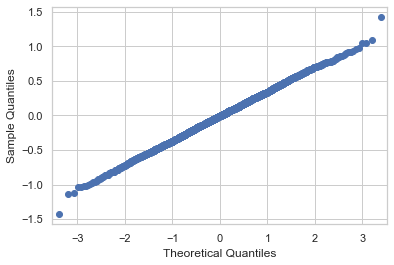

In [125]:
fig = sm.qqplot(res)

In [126]:
plt.show()